# Análisis de Red de Transporte Aéreo

In [1]:
using DelimitedFiles
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
using LightGraphs
using Distributions
using GLM
using DataFrames
using StatsBase

┌ Info: Recompiling stale cache file /Users/yuriko/.julia/compiled/v1.1/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1184
┌ Warning: Package Distributions does not have Test in its dependencies:
│ - If you have Distributions checked out for development and have
│   added Test as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Distributions
└ Loading Test into Distributions from project dependency, future warnings for Distributions are suppressed.
┌ Info: Recompiling stale cache file /Users/yuriko/.julia/compiled/v1.1/GLM/6OREG.ji for GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1184


### Se crea tabla de información con nodos y enlaces

In [3]:
#SE IMPORTA LA LISTA DE AEROLÍNEAS
info_aerolineas = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/nueva_lista_aerolineas.csv", ',', String);
lista_aerolineas = info_aerolineas[:, 2]

526-element Array{String,1}:
 "Airlines"     
 "global"       
 "Star_Alliance"
 "Sky_Team"     
 "oneworld"     
 "AA"           
 "TK"           
 "DL"           
 "MU"           
 "CZ"           
 "UA"           
 "FR"           
 "BA"           
 ⋮              
 "H7"           
 "GY"           
 "EW"           
 "D6"           
 "7E"           
 "6Y"           
 "6I"           
 "5M"           
 "5G"           
 "4K"           
 "4D"           
 "4B"           

### Densidad de la red dirigida
$$ D(A, B) = \frac{|E|}{|V| ( |V| - 1 )}$$

con $A$ y $B$ conjuntos,  
$E$ los enlaces y  
$V$ los vértices

### Grado promedio de la red dirigida
$$ c = \frac{m}{n}$$

con  
$m$ los enlaces y  
$n$ los vértices

In [4]:
#NOMBRE DE LA AEROLÍNEA (ARCHIVO) ciclo for para todas las aerolíneas

tabla_info_net = ["Airline" "Nodes" "Links" "Density" "Av. Degree" "Av. Betweenness" " Global Clustering Coefficient" "Coverage" "Normalización"]

for i in 2:length(lista_aerolineas) #Desde el 2 para no tomar la primera entrada "Airlines"
    
    airline_code = lista_aerolineas[i] #Código
    aerolinea_matriz = string(airline_code, "_import_matrix.csv")
    leo_matriz = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/matriz/$aerolinea_matriz", Int64)
    
    nodos = size(leo_matriz)[1]
    enlaces = counts(leo_matriz)[2]
    
    denom = nodos * (nodos - 1)
    densidad = enlaces / denom
    
    aerolinea_in_degree = string(airline_code, "_in_degree.csv")
    #leo_in_degree = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/grados/$aerolinea_in_degree", Float64)
    promedio_degree = enlaces/nodos
    #datos_in_degree = push!(datos_in_degree, promedio_degree)
    
    grafo = DiGraph(leo_matriz)
    
    res = betweenness_centrality(grafo, endpoints=true)
    av_bet = mean(res)
    
    gcc = global_clustering_coefficient(grafo)

    aerolinea_cobertura = string(airline_code, "_layer_coverage.csv")
    leo_cobertura = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/cobertura2/$aerolinea_cobertura", Float64)
    #coberturas = push!(coberturas, leo_cobertura[1])

    normalizacion = leo_cobertura / nodos
    
    renglon = [airline_code nodos enlaces densidad promedio_degree av_bet gcc leo_cobertura[1] normalizacion]
    tabla_info_net = vcat(tabla_info_net, renglon)
    
end

return tabla_info_net 

526×9 Array{Any,2}:
 "Airline"            "Nodes"  …     "Coverage"   "Normalización"
 "global"         3072            543.748        0.177001        
 "Star_Alliance"   934            384.347        0.411507        
 "Sky_Team"        900            288.584        0.320648        
 "oneworld"        698            141.492        0.202711        
 "AA"              259         …   57.159        0.220691        
 "TK"              242            232.862        0.96224         
 "DL"              230             67.1714       0.29205         
 "MU"              192            180.858        0.941967        
 "CZ"              188            126.27         0.671648        
 "UA"              184         …  120.547        0.655149        
 "FR"              176            164.743        0.936038        
 "BA"              175            174.089        0.994793        
 ⋮                             ⋱                                 
 "H7"                2              2.0          1.0    

## Ejemplo GLM (Linear regression)

In [ ]:
data1 = DataFrame(X=[1,2,3], Y=[2,4,7])

In [ ]:
typeof(data1)

In [ ]:
ols = lm(@formula(Y ~ X), data1)

# Función para encontrar la regresión lineal

In [11]:
function regresion_lineal(N::String, V::String)
    
    if N == "Global y Alianzas"
        k1 = 2
        k2 = 5
        
        elseif N == "Alianzas"
            k1 = 3
            k2 = 5
            
            elseif N == "Alianzas y Aerolíneas"
                k1 = 3
                k2 = length(lista_aerolineas)
   
                
                elseif N == "Aerolíneas"
                    k1 = 6
                    k2 = length(lista_aerolineas)
                
    end
    
    if V == "Nodes"
        c = 2
        t = Int64
        
        elseif V == "Links"
            c = 3
            t = Int64
            
            elseif V == "Density"
                c = 4
                t = Float64
                
                elseif V == "Av. Degree"
                    c = 5
                    t = Float64
                    
                    elseif V == "Av. Betweenness"
                        c = 6
                        t = Float64
                        
                        elseif V == "Global Clustering Coefficient"
                            c = 7
                            t = Float64
                            
                       
    end
    
    columna_x = tabla_info_net[:, c] #columna propiedad buscada, x
    x = columna_x[k1:k2]
    x = convert(Array{t,1}, x)
    
    columna_y = tabla_info_net[:, 9] #columna cobertura, y
    y = columna_y[k1:k2]
    y = convert(Array{Float64,1}, y)
    
    #y_cobertura = Array{Float64}(undef, 0)
    
    df_cov = hcat(x, y)
    df_cov = convert(DataFrame, df_cov)
    
    cov = lm(@formula(x2 ~ x1), df_cov)
    
    return cov
    
end

regresion_lineal (generic function with 1 method)

In [167]:
function regresion_lineal_cob(N::String, V::String)
    
    if N == "Global y Alianzas"
        k1 = 2
        k2 = 5
        
        elseif N == "Alianzas"
            k1 = 3
            k2 = 5
            
            elseif N == "Alianzas y Aerolíneas"
                k1 = 3
                k2 = length(lista_aerolineas)
   
                
                elseif N == "Aerolíneas"
                    k1 = 6
                    k2 = length(lista_aerolineas)
                
    end
    
    if V == "Nodes"
        c = 2
        t = Int64
        
        elseif V == "Links"
            c = 3
            t = Int64
            
            elseif V == "Density"
                c = 4
                t = Float64
                
                elseif V == "Av. Degree"
                    c = 5
                    t = Float64
                    
                    elseif V == "Av. Betweenness"
                        c = 6
                        t = Float64
                        
                        elseif V == "Global Clustering Coefficient"
                            c = 7
                            t = Float64
                            
                       
    end
    
    columna_x = tabla_info_net[:, c] #columna propiedad buscada, x
    x = columna_x[k1:k2]
    x = convert(Array{t,1}, x)
    
    columna_y = tabla_info_net[:, 8] #columna cobertura, y
    y = columna_y[k1:k2]
    y = convert(Array{Float64,1}, y)
    
    #y_cobertura = Array{Float64}(undef, 0)
    
    df_cov = hcat(x, y)
    df_cov = convert(DataFrame, df_cov)
    
    cov = lm(@formula(x2 ~ x1), df_cov)
    
    return cov
    
end

regresion_lineal_cob (generic function with 1 method)

## Análisis de coberturas para Nodos 

### Encontramos la regresión lineal (Global y Alianzas)

In [12]:
reg_n_ga = regresion_lineal("Global y Alianzas", "Nodes")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
                Estimate  Std.Error   t value Pr(>|t|)
(Intercept)     0.352411  0.0980953   3.59253   0.0695
x1           -5.31362e-5 5.75868e-5 -0.922715   0.4536


In [7]:
r_2 = round.(r2(reg_n_ga), digits=5)

0.73251

In [ ]:
round.(stderror(reg_n_ga), digits=5);

In [ ]:
round.(predict(reg_n_ga), digits=5);

### Gráfica de cobertura (Nodos vs. Cobertura. Global & Alianzas)

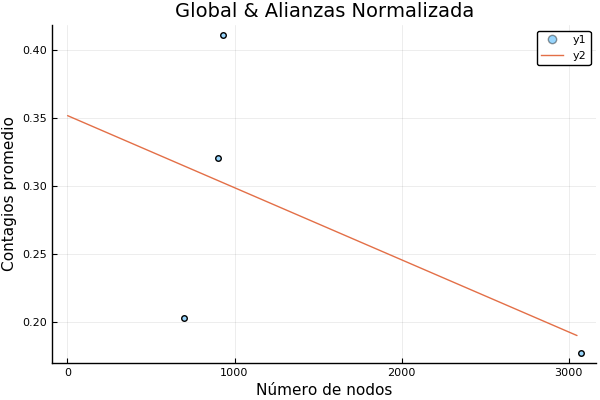

In [214]:

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]
#@show y
equation(x) = -5.31362e-5*x + 0.352

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas Normalizada",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:3050, 
    legend = true)


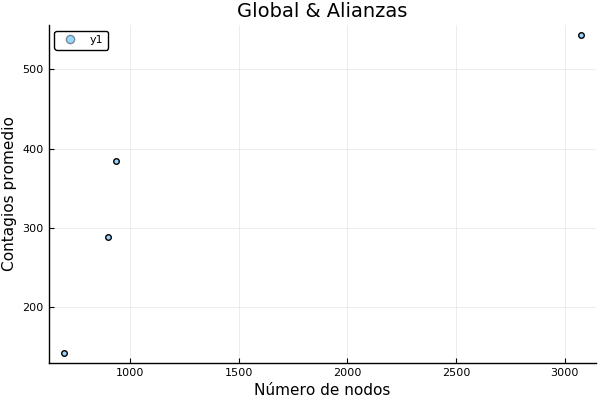

In [116]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

#equation(x) = 0.129*x + 159.523

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:3050, 
#    legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [14]:
reg_n_al = regresion_lineal("Alianzas", "Nodes")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
                Estimate Std.Error  t value Pr(>|t|)
(Intercept)    -0.346843  0.216343 -1.60321   0.3550
x1           0.000780172 0.0002544  3.06671   0.2007


In [15]:
r_2 = round.(r2(reg_n_al), digits=5)

0.90389

### Gráfica de cobertura (Nodos vs. Cobertura. Alianzas)

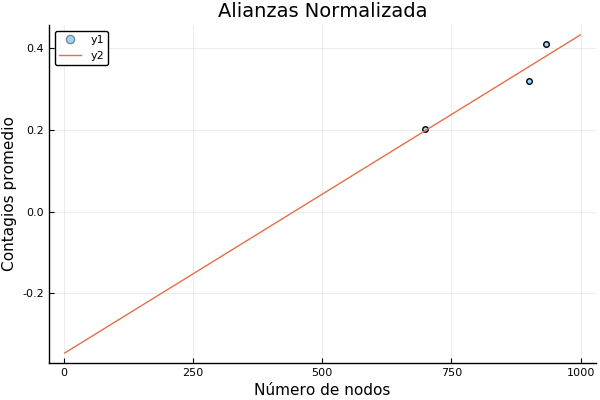

In [215]:

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 0.00078*x - 0.346843

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas Normalizada",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:1000,
    legend = true)


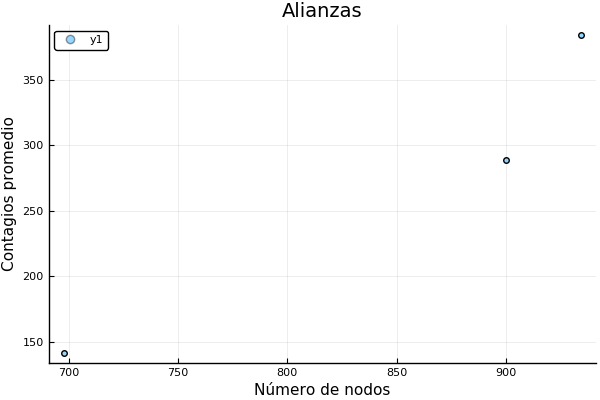

In [117]:
##x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

#equation(x) = 0.923*x - 507.034

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:1000,
#    legend = true)
#

El error en cuanto a la intersección es muy grande porque solo se tienen 3 puntos para la regresión lineal. 
Se podría decir que con mayor cantidad de nodos en la red de alianzas, la cobertura de contagios es mayor.

## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [19]:
reg_n_aa = regresion_lineal("Alianzas y Aerolíneas", "Nodes")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
                 Estimate  Std.Error  t value Pr(>|t|)
(Intercept)      0.915781 0.00940744  97.3465   <1e-99
x1           -0.000710757 0.00011859 -5.99339    <1e-8


In [20]:
r_2 = round.(r2(reg_n_aa), digits=5)

0.06438

### Gráfica de cobertura (Nodos vs. Cobertura. Alianzas & Aerolíneas)

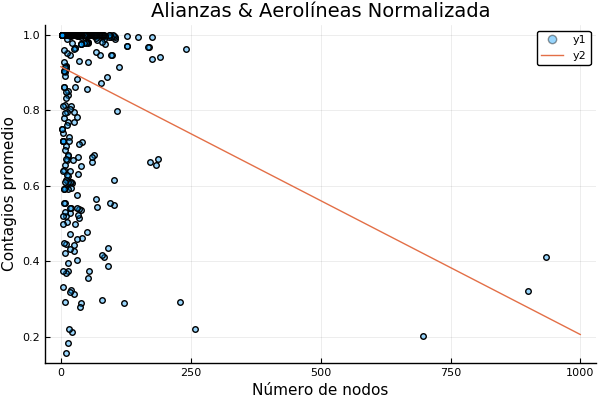

In [216]:

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -0.00071*x + 0.915781

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Normalizada",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:1000, 
    legend = true)


In [168]:
regc_n_aa = regresion_lineal_cob("Alianzas y Aerolíneas", "Nodes")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)   11.8424  0.948903 12.4801   <1e-30
x1           0.430781 0.0119619 36.0128   <1e-99


In [169]:
rc_2 = round.(r2(regc_n_aa), digits=5)

0.71302

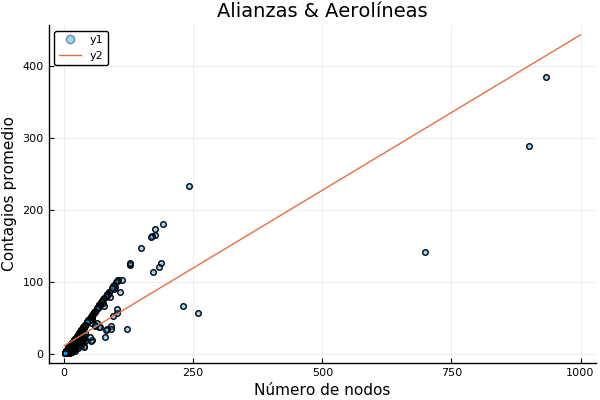

In [170]:
#x = ["Global", "Star Alliance", "Sky Team", "oneworld"]

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.430781*x + 11.8424

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:1000, 
    legend = true)


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [22]:
reg_n_aer = regresion_lineal("Aerolíneas", "Nodes")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
                 Estimate   Std.Error  t value Pr(>|t|)
(Intercept)      0.917403   0.0109301  83.9336   <1e-99
x1           -0.000765886 0.000234917 -3.26025   0.0012


In [23]:
r_2 = round.(r2(reg_n_aer), digits=5)

0.02007

### Gráfica de cobertura (Nodos vs. Cobertura. Aerolíneas)

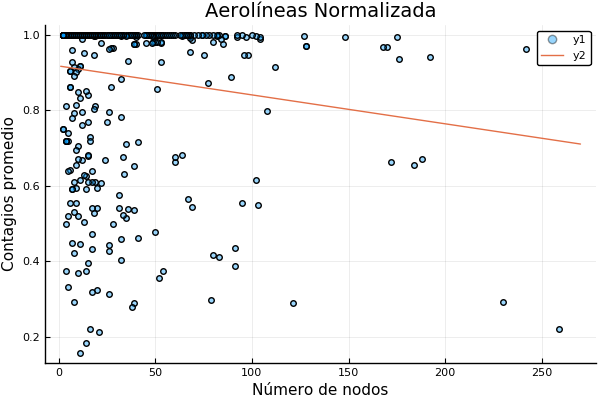

In [217]:

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -0.000765886*x + 0.917403

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Normalizada",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:270, 
    legend = true)


In [172]:
regc_n_aer = regresion_lineal_cob("Aerolíneas", "Nodes")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)    2.4512  0.683178 3.58794   0.0004
x1           0.775575 0.0146833 52.8203   <1e-99


In [173]:
rc_2 = round.(r2(regc_n_aer), digits=5)

0.84315

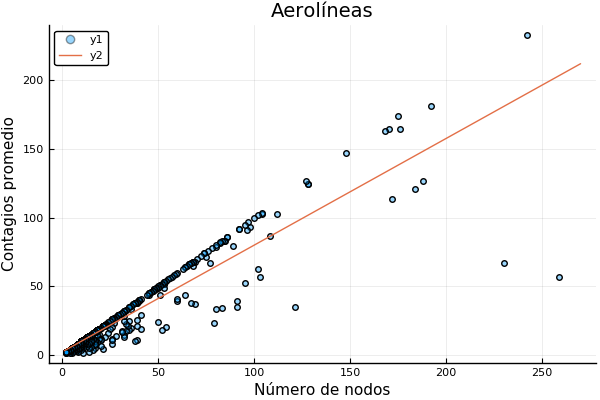

In [174]:

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end

equation(x) = 0.775575*x + 2.4512

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:270, 
    legend = true)


En general, en cuanto a la relación de la cobertura de contagios respecto al número de nodos de la red, es lineal.

## Análisis de coberturas para Enlaces

### Encontramos la regresión lineal (Global y Alianzas)

In [25]:
reg_l_ga = regresion_lineal("Global y Alianzas", "Links")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
                Estimate  Std.Error   t value Pr(>|t|)
(Intercept)     0.330314  0.0796054    4.1494   0.0535
x1           -4.26421e-6 4.62412e-6 -0.922168   0.4538


In [26]:
r_2 = round.(r2(reg_l_ga), digits=5)

0.29834

### Gráfica de cobertura (Links vs. Cobertura. Global & Alianzas)

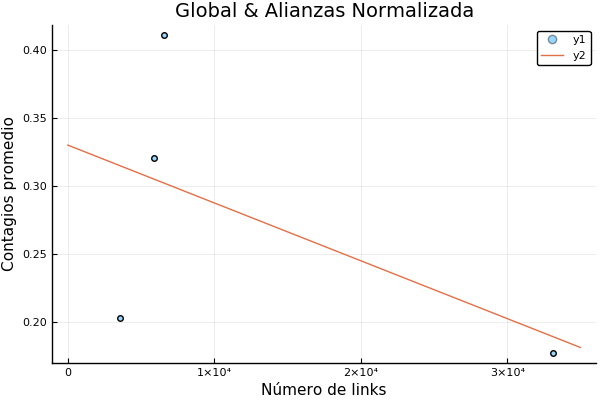

In [218]:

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = -4.26421e-6*x + 0.330314 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas Normalizada",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:35000, 
    legend = true)


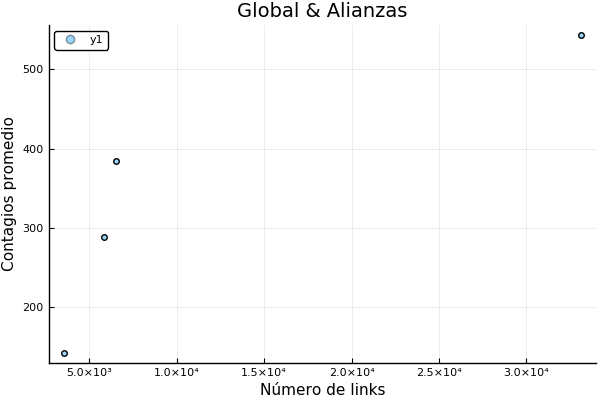

In [120]:

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

#equation(x) = 0.010*x + 213.126 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:35000, 
#    legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [28]:
reg_l_al = regresion_lineal("Alianzas", "Links")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
               Estimate  Std.Error   t value Pr(>|t|)
(Intercept)  -0.0371752   0.084347 -0.440741   0.7357
x1           6.53546e-5 1.53728e-5   4.25131   0.1471


In [29]:
r_2 = round.(r2(reg_l_al), digits=5)

0.94757

### Gráfica de cobertura (Links vs. Cobertura. Alianzas)

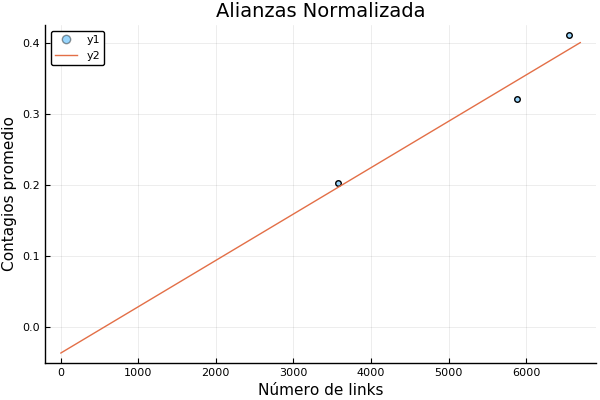

In [219]:

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 6.53546e-5*x - 0.0371752 #CAmbiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas Normalizada",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:6700, 
    legend = true)


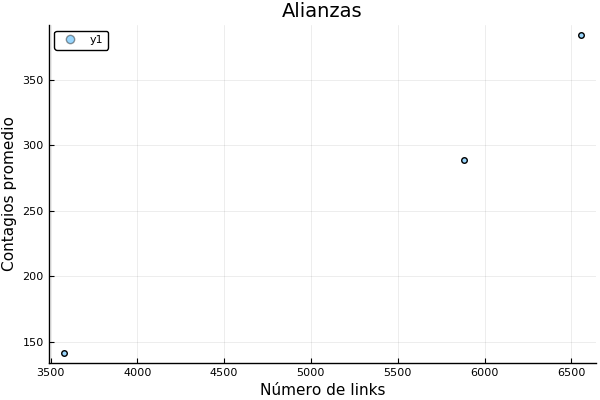

In [121]:

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

#equation(x) = 0.077*x - 138.752 #CAmbiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:6700, 
#    legend = true)


## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [31]:
reg_l_aa = regresion_lineal("Alianzas y Aerolíneas", "Links")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
                 Estimate  Std.Error t value Pr(>|t|)
(Intercept)      0.904557 0.00889736 101.666   <1e-99
x1           -0.000102063 1.90712e-5 -5.3517    <1e-6


In [32]:
r_2 = round.(r2(reg_l_aa), digits=5)

0.05201

### Gráfica de cobertura (Nodos vs. Cobertura. Alianzas & Aerolíneas)

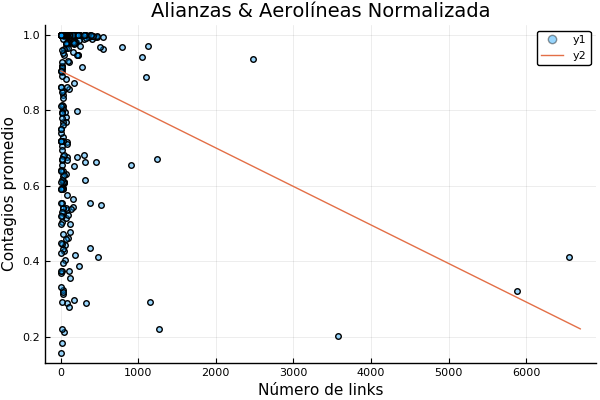

In [220]:

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -0.000102063*x + 0.904557 #CAMBIAr

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Normalizada",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:6700, 
 legend = true)


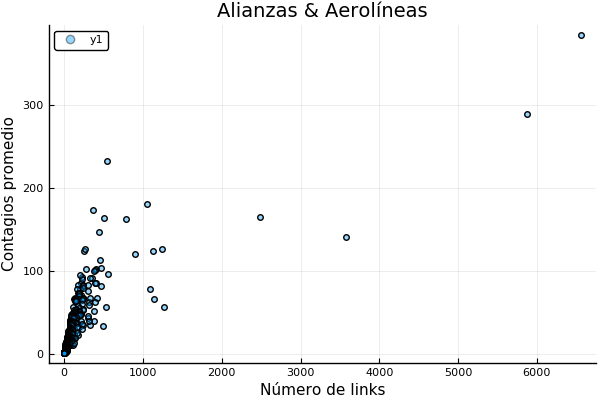

In [122]:

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


#equation(x) = -0.000102063*x + 0.904557 #CAMBIAr

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:6700, 
 #legend = true)


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [34]:
reg_l_aer = regresion_lineal("Aerolíneas", "Links")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
                 Estimate  Std.Error  t value Pr(>|t|)
(Intercept)      0.905109 0.00957903  94.4886   <1e-99
x1           -0.000104978 4.48772e-5 -2.33922   0.0197


In [35]:
r_2 = round.(r2(reg_l_aer), digits=5)

0.01043

### Gráfica de cobertura (Links vs. Cobertura. Aerolíneas)

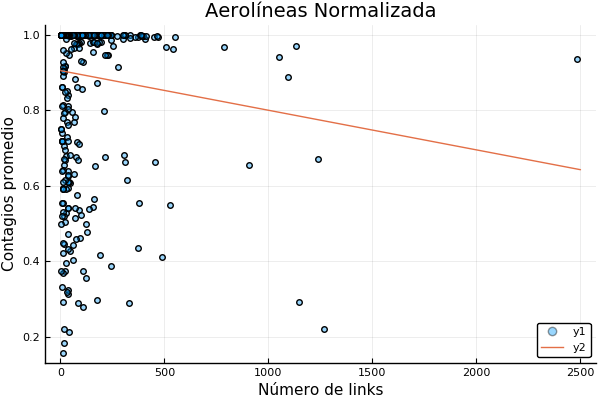

In [221]:

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -0.000104978*x + 0.905109 #CAMBUar

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Normalizada",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:2500, 
    legend = true)


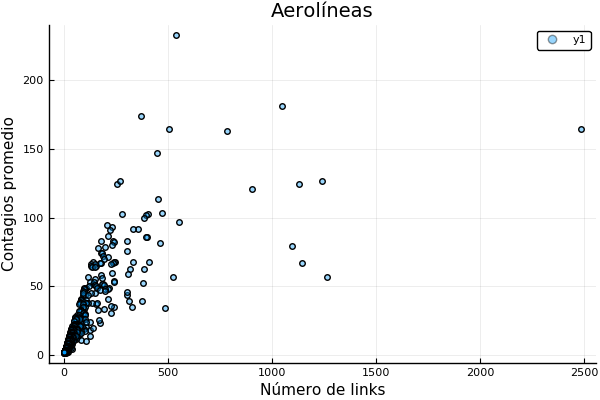

In [123]:

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


#equation(x) = 0.120*x + 13.728 #CAMBUar

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:2500, 
#    legend = true)


En general, en cuanto a la dependencia de la cobertura de contagios respecto al número de enlaces de la red, 
es una lineal, A mayor número de enlaces, mayor cobertura.

## Análisis de coberturas para Densidad

### Encontramos la regresión lineal (Global y Alianzas)

In [37]:
reg_d_ga = regresion_lineal("Global y Alianzas", "Density")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error  t value Pr(>|t|)
(Intercept)  0.0469201  0.201561 0.232783   0.8376
x1             36.0302   30.4065  1.18495   0.3578


In [38]:
r_2 = round.(r2(reg_d_ga), digits=5)

0.41247

### Gráfica de cobertura (Densidad vs. Cobertura. Global & Alianzas)

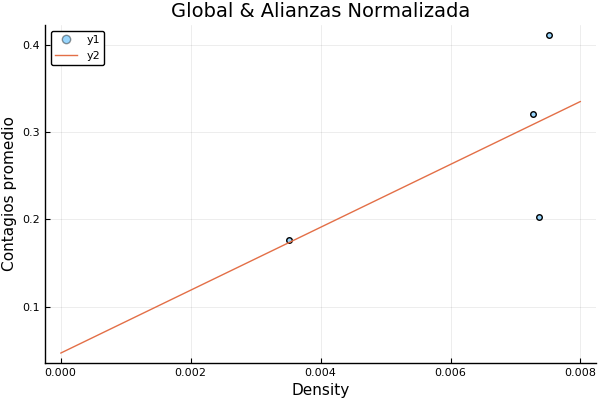

In [222]:

w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = 36.0302*x + 0.0469201 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas Normalizada",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.001:0.008, 
    legend = true)


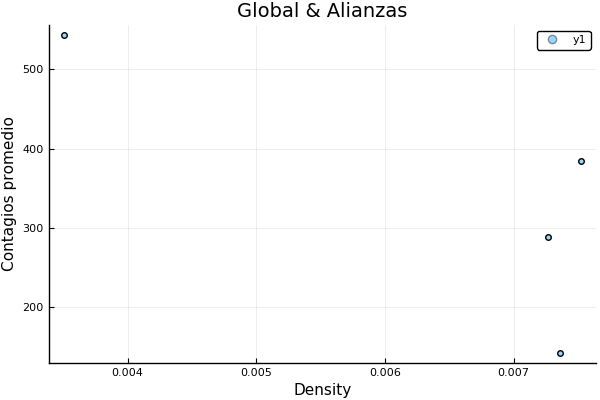

In [124]:

w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]


#equation(x) = -68562.1*x + 780.03 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.01:0.01, 
#    legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [47]:
reg_d_al = regresion_lineal("Alianzas", "Density")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error   t value Pr(>|t|)
(Intercept)  -3.14557   4.91306 -0.640246   0.6375
x1              468.4   665.583  0.703744   0.6096


In [48]:
r_2 = round.(r2(reg_d_al), digits=5)

0.33122

### Gráfica de cobertura (Density vs. Cobertura. Alianzas)

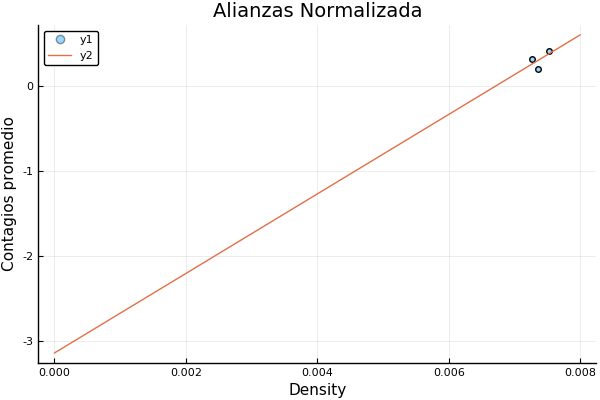

In [223]:
w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 468.4*x - 3.14557 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas Normalizada",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.001:0.008, 
    legend = true)


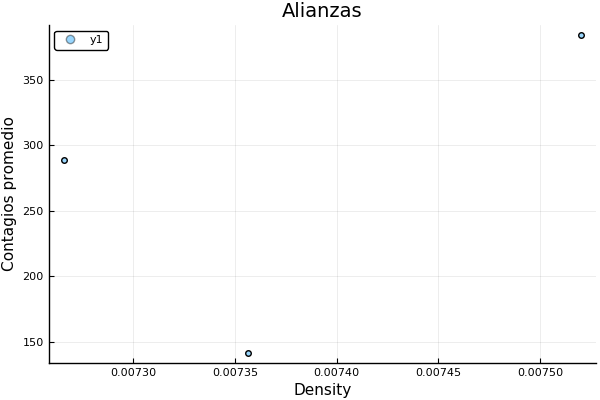

In [125]:
w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

#equation(x) = 5.09149e5*x - 3485.61 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.01:0.01, 
#    legend = true)


## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [52]:
reg_d_aa = regresion_lineal("Alianzas y Aerolíneas", "Density")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)  0.840186 0.0120936 69.4736   <1e-99
x1           0.213586 0.0354787 6.02013    <1e-8


In [53]:
r_2 = round.(r2(reg_d_aa), digits=5)

0.06492

### Gráfica de cobertura (Densidad vs. Cobertura. Alianzas & Aerolíneas)

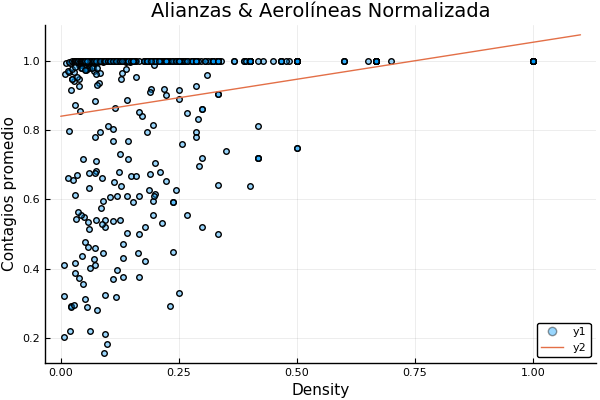

In [224]:
w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end

equation(x) = 0.213586*x + 0.840186 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Normalizada",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.01:1.1, 
    legend = true)


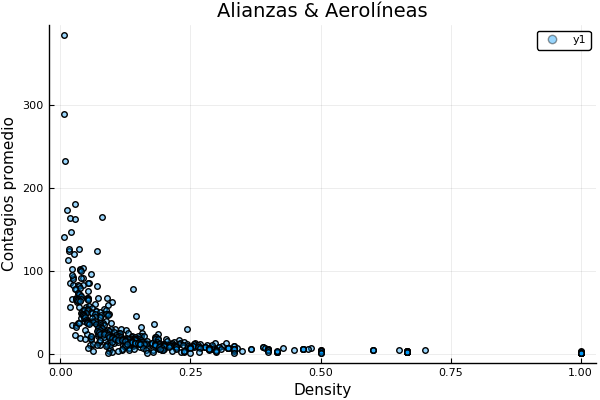

In [126]:
w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end

#equation(x) = -69.635*x + 43.308 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.01:1.1, 
#    legend = true)


In [177]:
#log recta

    df_cov = hcat(x, y)
    df_cov = convert(DataFrame, df_cov)
    
    cov = lm(@formula(x2 ~ x1), df_cov)
    

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  0.745155 0.0457838  16.2755   <1e-47
x1           -1.00516 0.0215087 -46.7327   <1e-99


In [178]:
round.(r2(cov), digits=5)

0.80709

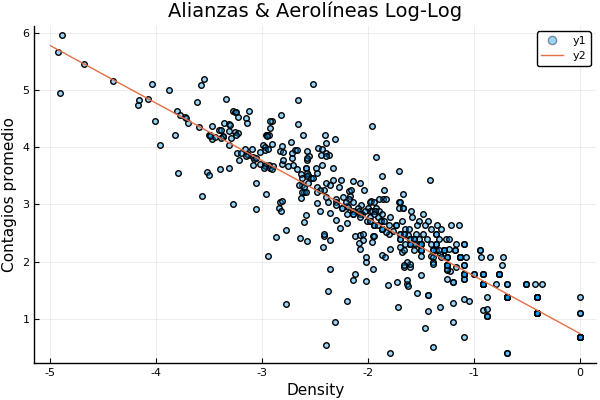

In [225]:
w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, log(w[i]))
    y = push!(y, log(c[i]))
end
return x,y

equation(x) = -1.00516*x + 0.745155 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Log-Log",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, -5:0.01:0, 
    legend = true)


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [58]:
reg_d_aer = regresion_lineal("Aerolíneas", "Density")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)  0.846279 0.0119251 70.9662   <1e-99
x1            0.20109 0.0348841 5.76452    <1e-7


In [59]:
r_2 = round.(r2(reg_d_aer), digits=5)

0.06017

### Gráfica de cobertura (Densidad vs. Cobertura. Aerolíneas)

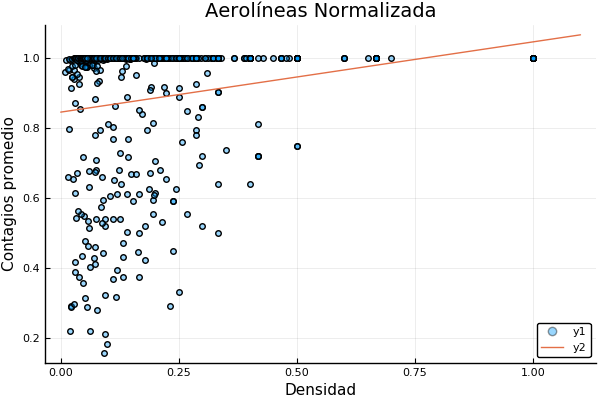

In [227]:

w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.20109*x + 0.846279 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Normalizada",
    xlabel = "Densidad",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.01:1.1, 
    legend = true)


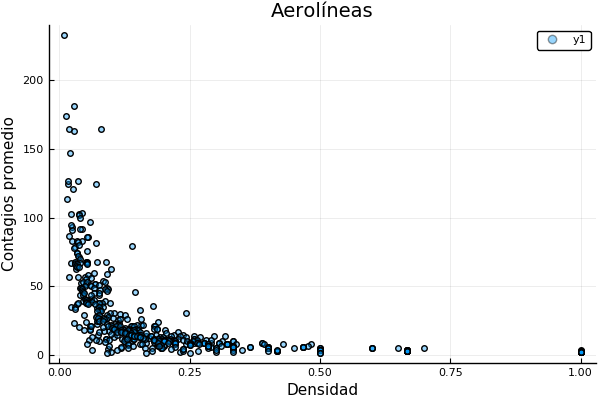

In [228]:

w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


#equation(x) = -64.225*x + 40.670 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Densidad",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.01:1.1, 
 #   legend = true)


In [192]:
#log recta

    df_cov = hcat(x, y)
    df_cov = convert(DataFrame, df_cov)
    
    cov = lm(@formula(x2 ~ x1), df_cov)
    

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  0.740709 0.0464664  15.9407   <1e-46
x1           -1.00804  0.022106 -45.6002   <1e-99


In [193]:
round.(r2(cov), digits=5)

0.80026

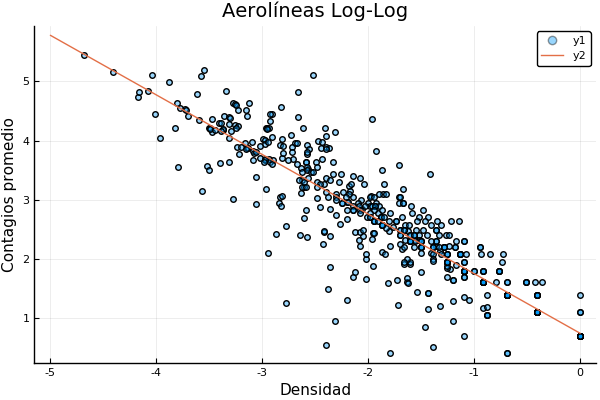

In [229]:
w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, log(w[i]))
    y = push!(y, log(c[i]))
end
return x,y

equation(x) = -1.00804*x + 0.740709 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Log-Log",
    xlabel = "Densidad",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, -5:0.01:0, 
    legend = true)


## Análisis de coberturas para Grado prom.

### Encontramos la regresión lineal (Global y Alianzas)

In [63]:
reg_ad_ga = regresion_lineal("Global y Alianzas", "Av. Degree")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
               Estimate Std.Error   t value Pr(>|t|)
(Intercept)    0.386838  0.230743   1.67649   0.2356
x1           -0.0147882 0.0301533 -0.490433   0.6724


In [64]:
r_2 = round.(r2(reg_ad_ga), digits=5)

0.10735

### Gráfica de cobertura (Grado vs. Cobertura. Global & Alianzas)

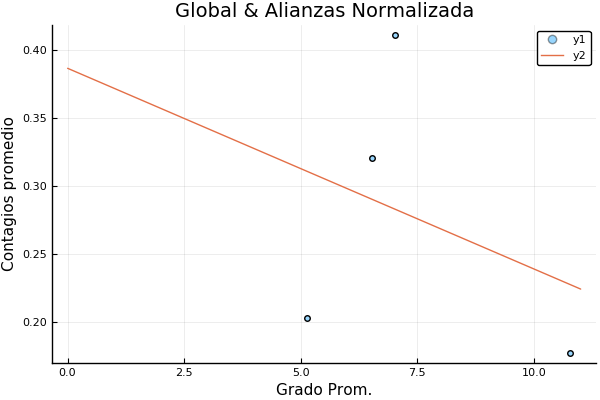

In [230]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = -0.0147882*x + 0.386838  #

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas Normalizada",
    xlabel = "Grado Prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:1:11, 
    legend = true)


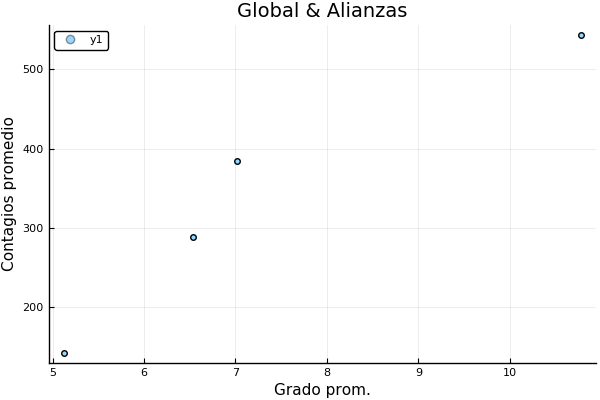

In [231]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

#equation(x) = 66.8273*x - 151.617  #

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Grado prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:1:11, 
 #   legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [67]:
reg_ad_al = regresion_lineal("Alianzas", "Av. Degree")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -0.339536  0.132866 -2.55547   0.2375
x1            0.104599 0.0211686  4.94126   0.1271


In [68]:
r_2 = round.(r2(reg_ad_al), digits=5)

0.96065

### Gráfica de cobertura (Grado vs. Cobertura. Alianzas)

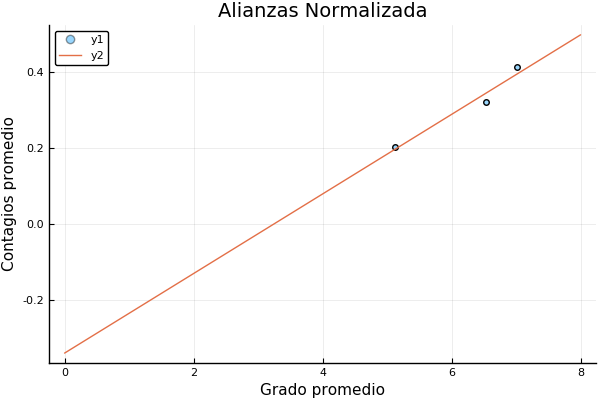

In [232]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 0.104599*x - 0.339536 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas Normalizada",
    xlabel = "Grado promedio",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:8, 
    legend = true)


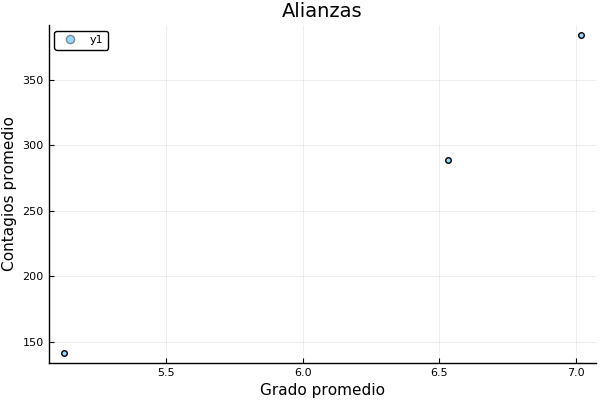

In [233]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 123.09*x - 493.93 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Grado promedio",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:8, 
 #   legend = true)


## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [71]:
reg_ad_aa = regresion_lineal("Alianzas y Aerolíneas", "Av. Degree")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
                 Estimate  Std.Error   t value Pr(>|t|)
(Intercept)      0.894211  0.0189048   47.3008   <1e-99
x1           -0.000971664 0.00694833 -0.139841   0.8888


In [72]:
r_2 = round.(r2(reg_ad_aa), digits=5)

4.0e-5

### Gráfica de cobertura (Grado vs. Cobertura. Alianzas & Aerolíneas)

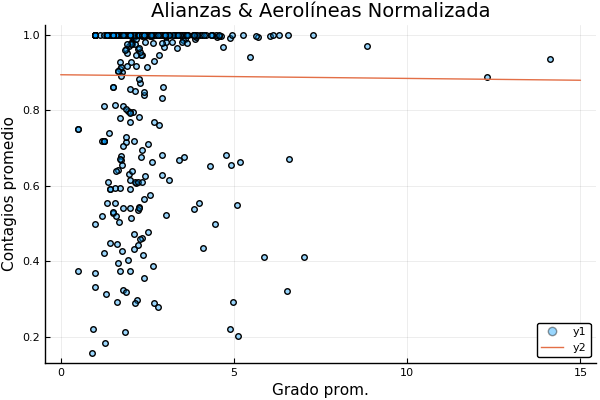

In [234]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -0.000971664*x + 0.894211 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Normalizada",
    xlabel = "Grado prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:1:15, 
    legend = true)


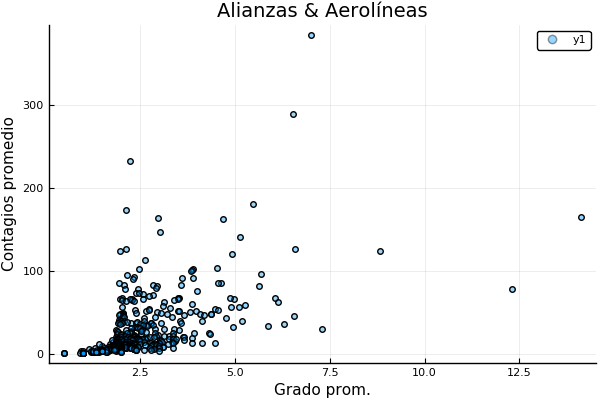

In [235]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 16.721*x - 13.7978 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Grado prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:1:15, 
 #   legend = true)


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [75]:
reg_ad_aer = regresion_lineal("Aerolíneas", "Av. Degree")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
               Estimate  Std.Error t value Pr(>|t|)
(Intercept)    0.878239   0.018759 46.8169   <1e-99
x1           0.00711574 0.00698219 1.01913   0.3086


In [76]:
r_2 = round.(r2(reg_ad_aer), digits=5)

0.002

### Gráfica de cobertura (Grado vs. Cobertura. Aerolíneas)

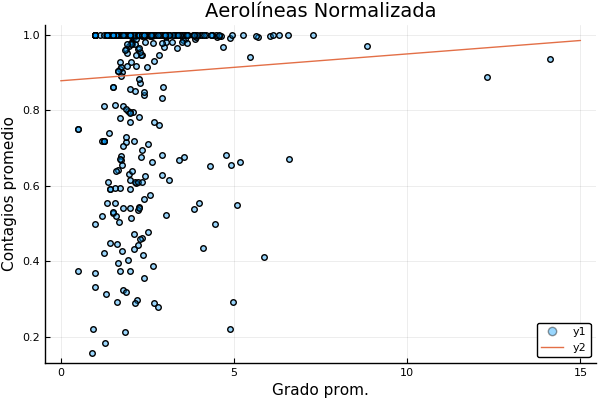

In [236]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.00711574*x + 0.878239 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Normalizada",
    xlabel = "Grado prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:15, 
    legend = true)


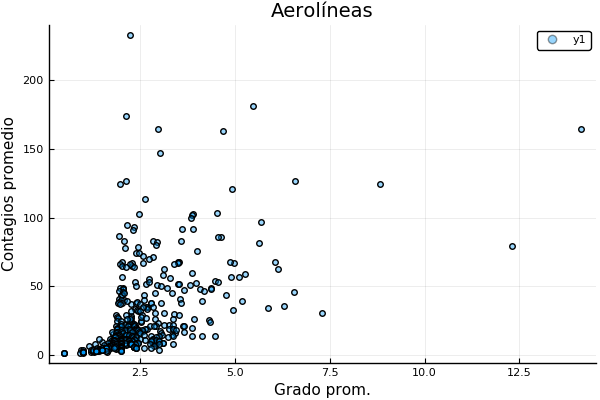

In [237]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 13.8297*x - 7.94881 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Grado prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:15, 
 #   legend = true)


## Análisis de coberturas para Betweenness

### Encontramos la regresión lineal (Global y Alianzas)

In [79]:
reg_ab_ga = regresion_lineal("Global y Alianzas", "Av. Betweenness")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  0.207269   0.17823  1.16293   0.3649
x1            16.5828   39.0344 0.424826   0.7123


In [80]:
r_2 = round.(r2(reg_ab_ga), digits=5)

0.08277

### Gráfica de cobertura (Betweenness vs. Cobertura. Global & Alianzas)

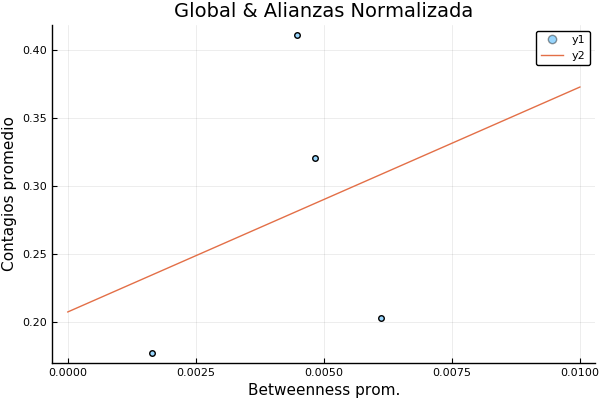

In [238]:
w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = 16.5828*x + 0.207269 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas Normalizada",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.01:0.01, 
    legend = true)


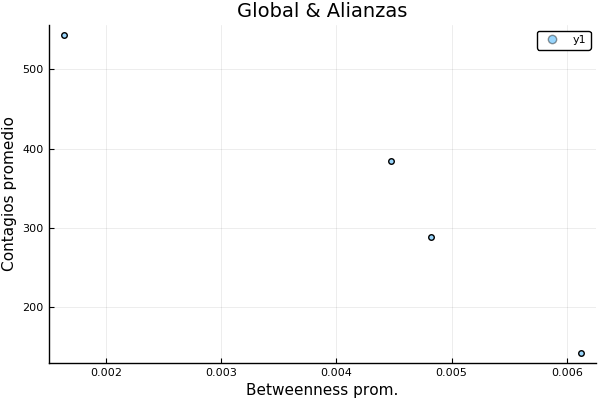

In [239]:
w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = -86244.9*x + 708.06 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.01:0.01, 
 #   legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [83]:
reg_ab_al = regresion_lineal("Alianzas", "Av. Betweenness")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  0.912596  0.154074   5.9231   0.1065
x1           -116.963   29.7054 -3.93744   0.1583


In [84]:
r_2 = round.(r2(reg_ab_al), digits=5)

0.93941

### Gráfica de cobertura (Av. Betweenness vs. Cobertura. Alianzas)

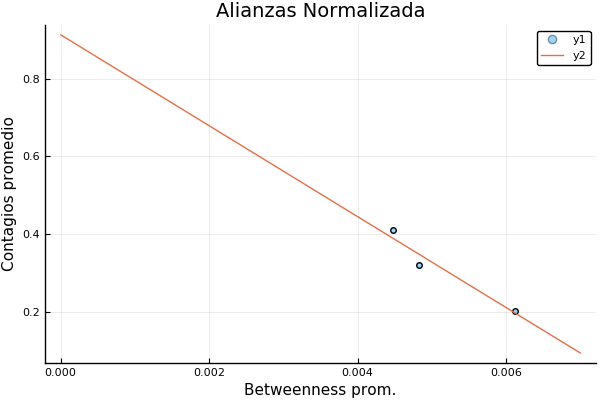

In [240]:
w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = -116.963*x + 0.912596 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas Normalizada",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.001:0.0075, 
    legend = true)


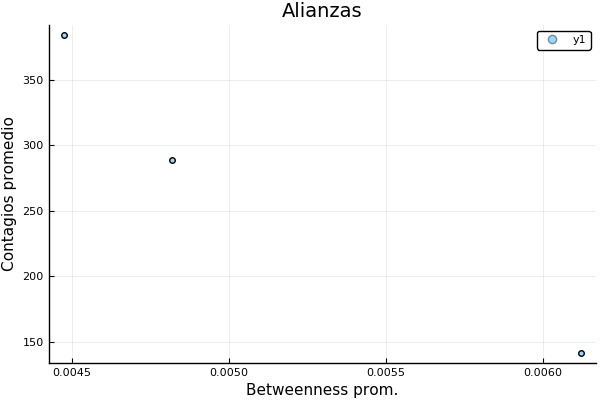

In [241]:
w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = -1.37974e5*x + 981.267 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.001:0.01, 
 #   legend = true)


## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [88]:
reg_ab_aa = regresion_lineal("Alianzas y Aerolíneas", "Av. Betweenness")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error t value Pr(>|t|)
(Intercept)   0.860144  0.011049 77.8478   <1e-99
x1           0.0676561 0.0147006 4.60227    <1e-5


In [89]:
r_2 = round.(r2(reg_ab_aa), digits=5)

0.03899

### Gráfica de cobertura (Betweenness vs. Cobertura. Alianzas & Aerolíneas)

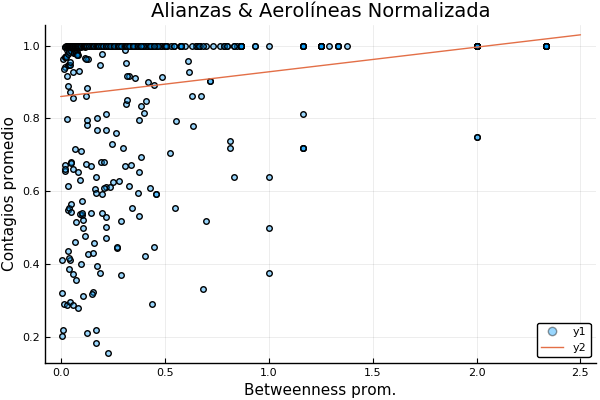

In [242]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.0676561*x + 0.860144 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Normalizada",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.1:2.5, 
    legend = true)


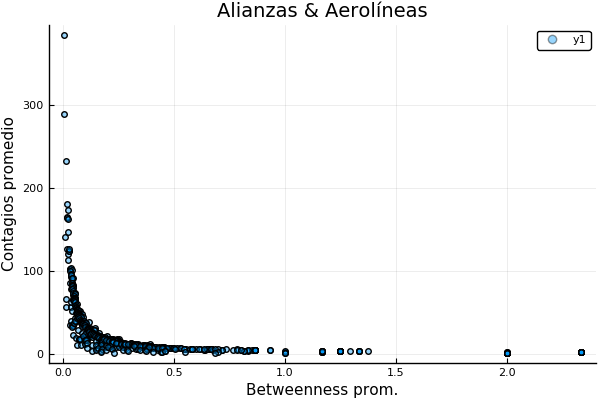

In [243]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


#equation(x) = -25.908*x + 38.6067 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.1:2.5, 
 #   legend = true)


In [201]:
#log recta

    df_cov = hcat(x, y)
    df_cov = convert(DataFrame, df_cov)
    
    cov = lm(@formula(x2 ~ x1), df_cov)
    

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error  t value Pr(>|t|)
(Intercept)    1.38602 0.0244525  56.6819   <1e-99
x1           -0.850142  0.012692 -66.9823   <1e-99


In [202]:
round.(r2(cov), digits=5)

0.89578

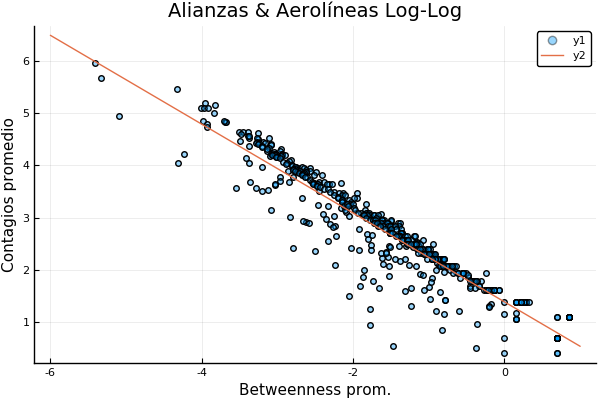

In [244]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, log(w[i]))
    y = push!(y, log(c[i]))
end


equation(x) = -0.850142*x + 1.38602 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Log-Log",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, -6:0.1:1, 
    legend = true)


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [92]:
reg_ab_aer = regresion_lineal("Aerolíneas", "Av. Betweenness")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error t value Pr(>|t|)
(Intercept)   0.865315 0.0108748 79.5706   <1e-99
x1           0.0633927 0.0144273 4.39394    <1e-4


In [93]:
r_2 = round.(r2(reg_ab_aer), digits=5)

0.03587

### Gráfica de cobertura (Betweenness vs. Cobertura. Aerolíneas)

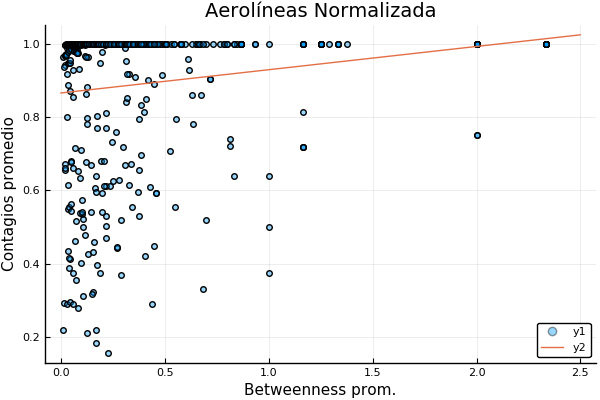

In [245]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.0633927*x + 0.865315 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Normalizada",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.01:2.5, 
    legend = true)


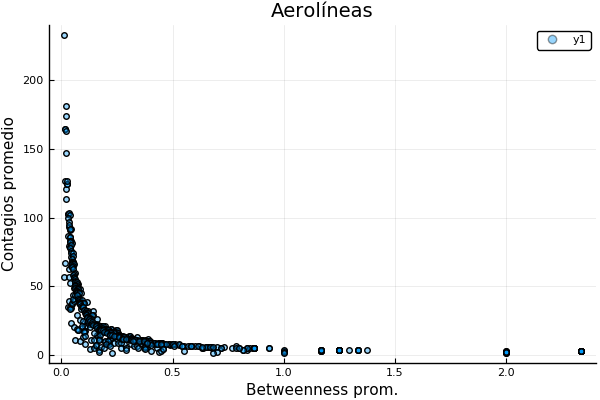

In [246]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -24.0899*x + 36.4025 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.01:2.5, 
 #   legend = true)


In [209]:
#log recta

    df_cov = hcat(x, y)
    df_cov = convert(DataFrame, df_cov)
    
    cov = lm(@formula(x2 ~ x1), df_cov)
    

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error  t value Pr(>|t|)
(Intercept)    1.38074 0.0246092  56.1066   <1e-99
x1           -0.855204 0.0130199 -65.6843   <1e-99


In [210]:
round.(r2(cov), digits=5)

0.89262

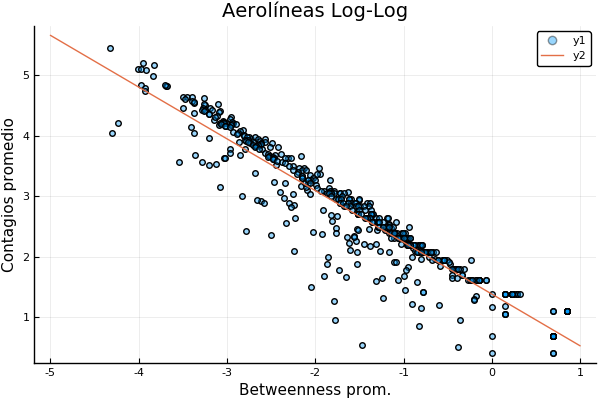

In [247]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, log(w[i]))
    y = push!(y, log(c[i]))
end


equation(x) = -0.855204*x + 1.38074 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Log-Log",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, -5:0.01:1, 
    legend = true)


## Análisis de coberturas para Global Clustering Coefficient

### Encontramos la regresión lineal (Global y Alianzas)

In [96]:
reg_gcc_ga = regresion_lineal("Global y Alianzas", "Global Clustering Coefficient")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error   t value Pr(>|t|)
(Intercept)   0.36326  0.215056   1.68914   0.2333
x1           -2.04863    4.9319 -0.415383   0.7182


In [97]:
r_2 = round.(r2(reg_gcc_ga), digits=5)

0.07942

### Gráfica de cobertura (Global Clustering Coefficient vs. Cobertura. Global & Alianzas)

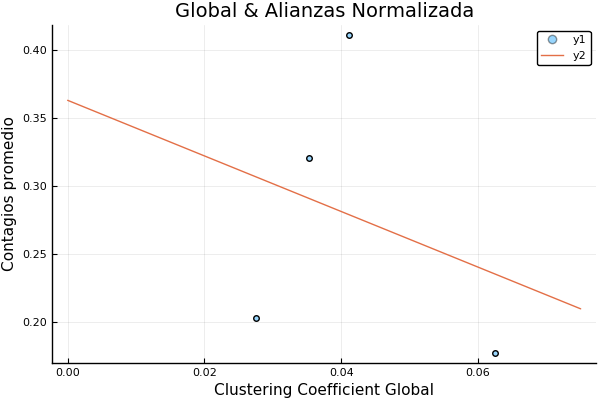

In [248]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = -2.04863*x + 0.36326 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas Normalizada",
    xlabel = "Clustering Coefficient Global",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.001:0.075, 
    legend = true)


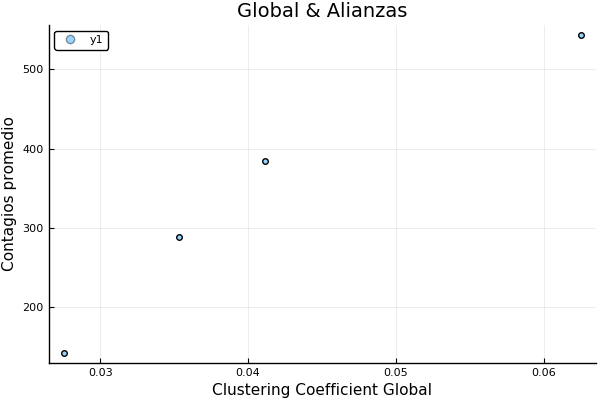

In [249]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = 10916.4*x - 114.121 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Clustering Coefficient Global",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.01:0.1, 
 #   legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [101]:
reg_gcc_al = regresion_lineal("Alianzas", "Global Clustering Coefficient")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate  Std.Error  t value Pr(>|t|)
(Intercept)  -0.220655 0.00440849 -50.0522   0.0127
x1             15.3446   0.125481  122.286   0.0052


In [102]:
r_2 = round.(r2(reg_gcc_al), digits=5)

0.99993

### Gráfica de cobertura (Global Clustering Coefficient vs. Cobertura. Alianzas)

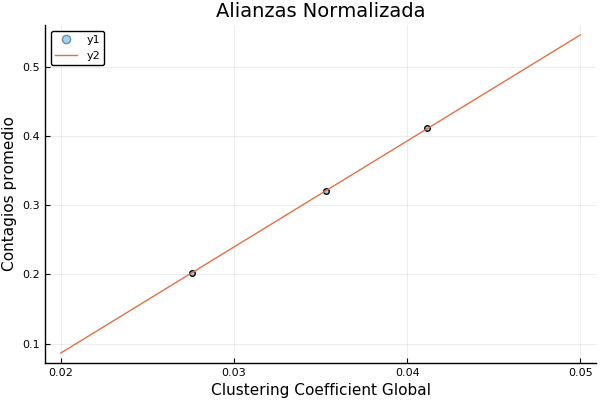

In [250]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 15.3446*x - 0.220655 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas Normalizada",
    xlabel = "Clustering Coefficient Global",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0.02:0.01:0.05, 
    legend = true)


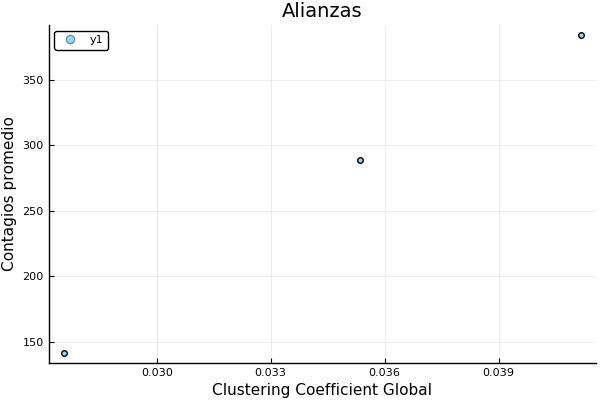

In [251]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 17892.4*x - 348.316 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Clustering Coefficient Global",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0.02:0.01:0.05, 
 #   legend = true)


## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [105]:
reg_gcc_aa = regresion_lineal("Alianzas y Aerolíneas", "Global Clustering Coefficient")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate  Std.Error  t value Pr(>|t|)
(Intercept)   0.896166 0.00933181  96.0335   <1e-99
x1           -0.151228   0.110147 -1.37297   0.1704


In [106]:
r_2 = round.(r2(reg_gcc_aa), digits=5)

0.0036

### Gráfica de cobertura (Global Clustering Coefficient vs. Cobertura. Alianzas & Aerolíneas)

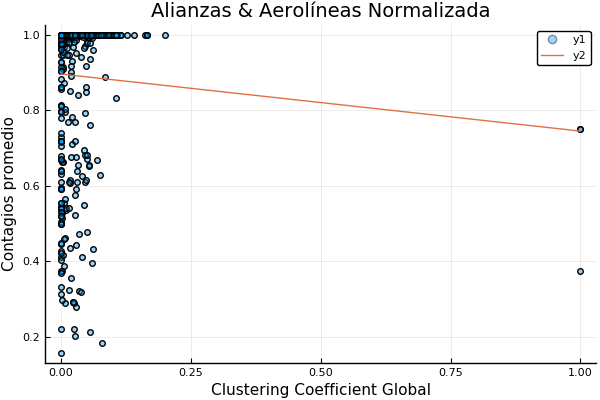

In [252]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -0.151228*x + 0.896166 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Normalizada",
    xlabel = "Clustering Coefficient Global",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:1:1, 
    legend = true)


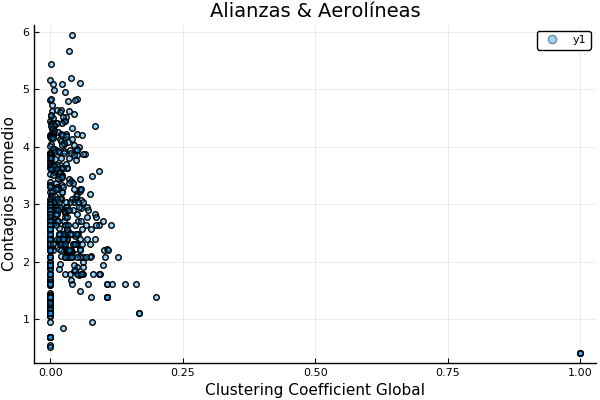

In [254]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, log(c[i]))
end


#equation(x) = -25.654*x + 27.1854 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Clustering Coefficient Global",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:1:1, 
#    legend = true)


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [109]:
reg_gcc_aer = regresion_lineal("Aerolíneas", "Global Clustering Coefficient")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate  Std.Error  t value Pr(>|t|)
(Intercept)    0.89942 0.00914885  98.3097   <1e-99
x1           -0.148365   0.107731 -1.37718   0.1691


In [110]:
r_2 = round.(r2(reg_gcc_aer), digits=5)

0.00364

### Gráfica de cobertura (Global Clustering Coefficient vs. Cobertura. Aerolíneas)

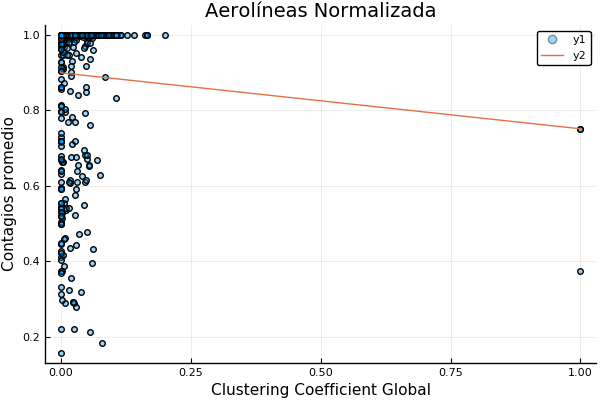

In [255]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -0.148365*x + 0.89942 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Normalizada",
    xlabel = "Clustering Coefficient Global",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.1:1, 
    legend = true)


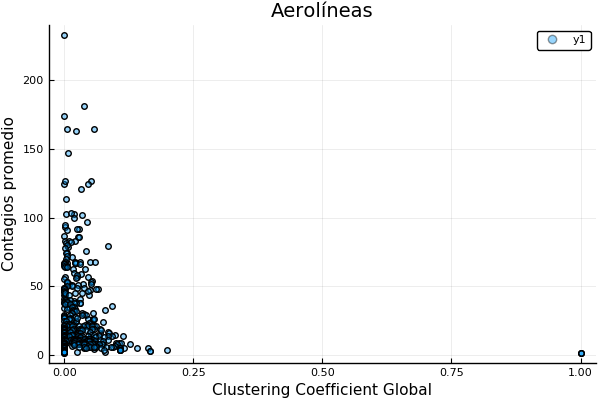

In [256]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -0.148365*x + 0.89942 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Clustering Coefficient Global",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.1:1, 
 #   legend = true)


### Similitud entre las redes de Aerolíneas (monocapas). Coeficiente de Jaccard

$$ J(A, B) = \frac{|A \cap B|}{|A \cup B|}$$

donde $A$ y $B$ son conjuntos

#### Tabla de coeficientes de Jaccard de las aerolíneas

In [114]:
#Checar

j_nodo = []
j_enlace = []
nombres = []


j_nodo = push!(j_nodo, "Jaccard C. Nodes")

j_enlace = push!(j_enlace, "Jaccard C. Links")

nombres =  push!(nombres, "Airline Codes")


k = 0

for i in 6:length(lista_aerolineas)
    
    nombres = push!(nombres, lista_aerolineas[i])
    
    inters_nodo = abs(tabla_info_net[i, 2])    
    #@show inters_nodo
    suma_nodo = abs(tabla_info_net[2, 2]) + abs(tabla_info_net[i, 2])
    #@show suma_nodo
    jaccy_nodo = inters_nodo / (suma_nodo - inters_nodo)
    #@show jaccy_nodo
    j_nodo = push!(j_nodo, jaccy_nodo)
    #@show j_nodo
    
    inters_enlace = abs(tabla_info_net[i, 3])
    suma_enlace = abs(tabla_info_net[2, 3]) + abs(tabla_info_net[i, 3])
    jaccy_enlace = inters_enlace / (suma_enlace - inters_enlace)
    j_enlace = push!(j_enlace, jaccy_enlace)
    #@show j_enlace
    

end

jaccard_tabla = hcat(nombres, j_nodo, j_enlace)

return jaccard_tabla

522×3 Array{Any,2}:
 "Airline Codes"   "Jaccard C. Nodes"   "Jaccard C. Links"
 "AA"             0.0843099            0.0382256          
 "TK"             0.078776             0.0163177          
 "DL"             0.0748698            0.0346297          
 "MU"             0.0625               0.0317288          
 "CZ"             0.0611979            0.0374702          
 "UA"             0.0598958            0.0273472          
 "FR"             0.0572917            0.0750612          
 "BA"             0.0569661            0.011241           
 "AF"             0.0559896            0.0136585          
 "LH"             0.0553385            0.0153205          
 "CA"             0.0546875            0.0237512          
 "SU"             0.0481771            0.0135376          
 ⋮                                                        
 "H7"             0.000651042          6.04357e-5         
 "GY"             0.000651042          6.04357e-5         
 "EW"             0.000651042       

### Distribución de grado

In [ ]:
function plot_distrib(distrib, tipo::String, titulo::String, color::String) #M::Array{Int64,2}

    distribucion = distrib

    graph = scatter(distribucion, fillcolor = color, markersize = 1, linealpha = 0.5,
    title = titulo,
    xlabel = "Grado",
    ylabel = "Frecuencia",
    xlims = (0,250), #obtener límites
    ylims = (0,850)) #obtener límites
end

In [ ]:
distrib_in_degree_G = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/grados/global_distrib_in_degree.csv", ',', Int64);
distrib_in_degree_SA = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Star_Alliance/grados/Star_Alliance_distrib_in_degree.csv", ',', Int64);
distrib_in_degree_OW = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/oneworld/grados/oneworld_distrib_in_degree.csv", ',', Int64);
distrib_in_degree_ST = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Sky_Team/grados/Sky_Team_distrib_in_degree.csv", ',', Int64);

In [ ]:
hist_in_degree_G = plot_distrib(distrib_in_degree_G, "in", "Global In degree distrib.", "black");
hist_in_degree_SA = plot_distrib(distrib_in_degree_SA, "in", "Star Alliance In degree distrib.", "grey");
hist_in_degree_ST = plot_distrib(distrib_in_degree_ST, "in", "Sky Team In degree distrib.", "blue");
hist_in_degree_OW = plot_distrib(distrib_in_degree_OW, "in", "oneworld In degree distrib.", "purple");

In [ ]:
plot(hist_in_degree_G,hist_in_degree_SA,hist_in_degree_ST,hist_in_degree_OW,layout=(2,2),legend=false)

In [ ]:
distrib_out_degree_G = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/grados/global_distrib_out_degree.csv", ',', Int64);
distrib_out_degree_SA = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Star_Alliance/grados/Star_Alliance_distrib_out_degree.csv", ',', Int64);
distrib_out_degree_OW = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/oneworld/grados/oneworld_distrib_out_degree.csv", ',', Int64);
distrib_out_degree_ST = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Sky_Team/grados/Sky_Team_distrib_out_degree.csv", ',', Int64);

In [ ]:
hist_out_degree_G = plot_distrib(distrib_out_degree_G, "out", "Global Out degree distrib.", "black");
hist_out_degree_SA = plot_distrib(distrib_out_degree_SA, "out", "Star Alliance Out degree distrib.", "grey");
hist_out_degree_ST = plot_distrib(distrib_out_degree_ST, "out", "Sky Team Out degree distrib.", "blue");
hist_out_degree_OW = plot_distrib(distrib_out_degree_OW, "out", "oneworld Out degree distrib.", "purple");

In [ ]:
plot(hist_out_degree_G,hist_out_degree_SA,hist_out_degree_ST,hist_out_degree_OW,layout=(2,2),legend=false)

In [ ]:
polyfit(x::Vector, y::Vector, deg::Int) = collect(v ^ p for v in x, p in 0:deg) \ y
x = [3072, 934, 900, 698]
y = [544.464, 384.997, 289.527, 142.492]
@show polyfit(x, y, 2)

### Gráficas

In [ ]:
x = [tabla_info_net[2,1], tabla_info_net[3,1], tabla_info_net[4,1], tabla_info_net[5,1]]
y1 = [tabla_info_net[2,2], tabla_info_net[3,2], tabla_info_net[4,2], tabla_info_net[5,2]]
y2 = [tabla_info_net[2,3], tabla_info_net[3,3], tabla_info_net[4,3], tabla_info_net[5,3]]
y3 = [tabla_info_net[2,4], tabla_info_net[3,4], tabla_info_net[4,4], tabla_info_net[5,4]]
y4 = [tabla_info_net[2,5], tabla_info_net[3,5], tabla_info_net[4,5], tabla_info_net[5,5]]
y5 = [tabla_info_net[2,6], tabla_info_net[3,6], tabla_info_net[4,6], tabla_info_net[5,6]]
plot(x, y1, alpha=0.7, line=(:dot, 1),marker=([:circle :d]), markersize=4,legendtitle="Key", label="Nodes", xlabel="Graph", ylabel="", title="Graph structure")
plot!(x, y2, alpha=0.7, line=(:dot, 1),marker=([:hex :d]), markersize=4, label="Links")
#plot!(x, y3, alpha=0.7, line=(:dot, 1),marker=([:ltriangle :d]), markersize=4, label="Jaccard coef. Nodes")
#plot!(x, y4, alpha=0.7, line=(:dot, 1),marker=([:dtriangle :d]), markersize=4, label="Jaccard coef. Links")
#plot!(x, y5, alpha=0.7, line=(:dot, 1),marker=([:diamond :d]), markersize=4, label="Density")

In [ ]:
x = [tabla_info_net[2,1], tabla_info_net[3,1], tabla_info_net[4,1], tabla_info_net[5,1]]
y3 = [tabla_info_net[2,4], tabla_info_net[3,4], tabla_info_net[4,4], tabla_info_net[5,4]]
y4 = [tabla_info_net[2,5], tabla_info_net[3,5], tabla_info_net[4,5], tabla_info_net[5,5]]
#y5 = [tabla_info_net[2,6], tabla_info_net[3,6], tabla_info_net[4,6], tabla_info_net[5,6]]
plot(x, y3, alpha=0.7, line=(:dot, 1),marker=([:ltriangle :d]), markersize=5, legendtitle="Key", label="Jaccard coef. Nodes", xlabel="Graph", ylabel="Jaccard coefficient", title="Jaccard coefficient distrib.")
plot!(x, y4, alpha=0.7, line=(:dot, 1),marker=([:dtriangle :d]), markersize=5, label="Jaccard coef. Links")

In [ ]:
x = [tabla_info_net[2,1], tabla_info_net[3,1], tabla_info_net[4,1], tabla_info_net[5,1]]
y5 = [tabla_info_net[2,6], tabla_info_net[3,6], tabla_info_net[4,6], tabla_info_net[5,6]]
plot(x, y5, alpha=0.7, line=(:dot, 1),marker=([:diamond :d]), markersize=4, legend=false, xlabel="Graph", ylabel="Density", title="Density distrib.")

* Entre más similar es la red de la alianza o aerolínea con la red global, la cobertura o área de contagio es mayor.
* La densidad no pareciera que tiene relación con el área de infección.

In [ ]:
x = ["Global", "Star Alliance", "Sky Team", "oneworld"]
y = [layer_cov_G[1], layer_cov_SA[1], layer_cov_ST[1], layer_cov_OW[1]]
b = bar(x, y,
    #color = "#0f87bf",
    title = "Cobertura promedio",
    xlabel = "Estructura de Red",
    ylabel = "Contagios promedio",
    legend = false,
    alpha = 0.4)

In [ ]:
x1 = ["Global"] 
x2 = ["Star Alliance"]
x3 = ["Sky Team"]
x4 = ["oneworld"]
y1 = [layer_cov_G[1]]
y2 = [layer_cov_SA[1]]
y3 = [layer_cov_ST[1]]
y4 = [layer_cov_OW[1]]
bar(x1,y1, color="black", alpha=0.7)
bar!(x2,y2, color="grey", alpha=0.7)
bar!(x3,y3, color="blue", alpha=0.7)
bar!(x4,y4, color="purple", alpha=0.7)

In [ ]:
x = ["Global", "Star Alliance", "Sky Team", "oneworld"]
y = [layer_cov_G[1], layer_cov_SA[1], layer_cov_ST[1], layer_cov_OW[1]]
b = bar(x, y, 
    #color = "#0f87bf",
    title = "Cobertura promedio",
    xlabel = "Estructura de Red",
    ylabel = "Contagios promedio",
    legend = false,
    alpha = 0.4)

In [ ]:
x1 = ["Healthy", "Inf. Global", "Inf. Star Alliance", "Inf. Sky Team", "Inf. oneworld"]
y1 = [82.277, 5.191, 3.108, 4.786, 4.638]
pie(x1, y1, title="Total", l=0.5)

In [ ]:
x = ["Sano", "Contagiado"]
y = [2527.54, 544.46]
plot(x, y, title = "Global", l = 0.5, seriestype =:pie)

In [ ]:
x = ["Sano", "Contagiado"]
y = [549.01, 384.99]
pie(x, y, title="Star Alliance", l=0.5)

In [ ]:
x = ["Sano", "Contagiado"]
y = [610.48, 289.52]
pie(x, y, title="Sky Team", l=0.5)

In [ ]:
x = ["Sano", "Contagiado"]
y = [555.51, 142.49]
pie(x, y, title="oneworld", l=0.5)

In [ ]:
x1 = ["Healthy"]
y1 = [82.277]
x2 = ["Inf. Global", "Inf. Star Alliance", "Inf. Sky Team", "Inf. oneworld"]
y2 = [3.191, 3.108, 4.786, 5.638]
pie(x1, y1, title="Total", l=0.5)
pie!(x2, y2)